#Presentation.

Using supervised learning techniques in AI to classify individuals as healthy or infected with Hepatitis C based on labeled data.



In [109]:
Name =' Santiago Vélez Flórez '
GitHub='GitHub: https://github.com/santiagovelezf '
LinkedIn='LinkedIn: https://www.linkedin.com/in/santiago-vélez-flórez-869155258 '
Email= 'Email: santiago.velezf@gmail.com '
Date =' Abril 2023 '
print("\n"+"By:", Name,"\n"+GitHub,"\n"+LinkedIn,"\n"+Email,"\n","\t", Date,"\n")


By:  Santiago Vélez Flórez  
GitHub: https://github.com/santiagovelezf  
LinkedIn: https://www.linkedin.com/in/santiago-vélez-flórez-869155258  
Email: santiago.velezf@gmail.com  
 	  Abril 2023  



#Import necessary libraries and dependencies.

In [110]:
from google.colab import drive #Access to Google Drive.
import os # Access directories.
import pandas as pd # Management of dataframes.
from IPython.display import Image # Show images.
import numpy as np # Mathematical tools for matrices and vectors.
import matplotlib.pyplot as plt # Graphs.
from sklearn.preprocessing import Normalizer #Normalizer.
from sklearn.decomposition import PCA  #Principal Component Analysis.
from imblearn.over_sampling import RandomOverSampler #Class balancing with data augmetation
from sklearn.model_selection import train_test_split #Train and Test Separation
from sklearn.ensemble import RandomForestClassifier #Model RandomForest
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score #Performance metrics

In [111]:
#from google.colab import drive #Acceso Drive
#import os #Acceder a directorios
#import pandas as pd #manejo de dataframes
#from IPython.display import Image #mostrar imagenes
#import numpy as np #Herramientas matematicas de matrices y vectores
#import matplotlib.pyplot as plt # graficas
#import seaborn as sns # graficas
#import plotly.express as px # graficas
#import plotly.offline as pyo # graficas
#from sklearn.feature_selection import SelectKBest #Selector caracteristicas
#from sklearn.feature_selection import chi2 #Selector caracteristicas
#from sklearn.feature_selection import f_classif #Selector caracteristicas
#from sklearn.preprocessing import StandardScaler #estandarizar datos
#from sklearn.decomposition import PCA #extraccion caracteristicas
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#extraccion caracteristicas
#from sklearn.preprocessing import Normalizer #Normalizacion
#from sklearn.linear_model import SGDClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score,precision_recall_curve,roc_curve, auc # metricas de precision
#from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import RandomOverSampler
#from sklearn.ensemble import RandomForestClassifier


#Accessing the Drive and locating the files.

In [112]:
#We give access from Google Colab to our Drive.
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [113]:
#We navigate to the desired address.
#There will be the data frame and other relevant files.
main_path='/content/drive/MyDrive/Inteligencia_Artificial/HCV_Classifier' #Root directory of our current project.
os.chdir(main_path) #Navigate to the directory.
print("Located in:",main_path)
!ls

Located in: /content/drive/MyDrive/Inteligencia_Artificial/HCV_Classifier
Distribution_classes.png  hcvdat0.csv
HCV_Classifier.ipynb	  Information_HCV.png


#Reading and preprocessing the database.

**We load the HCV database extracted from https://archive.ics.uci.edu/ml/datasets/HCV+data**

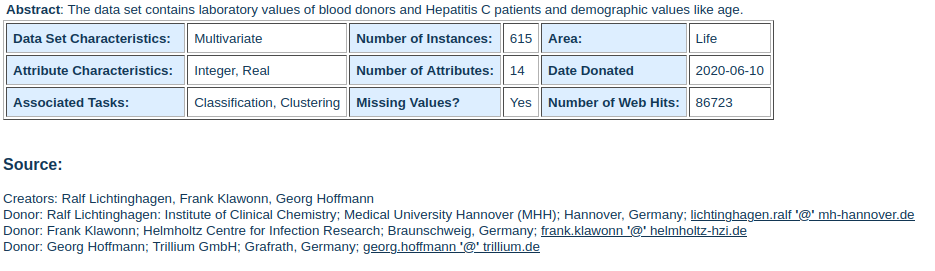

In [133]:
#Information about HCV.
Image(main_path+"/Information_HCV.png")

In [134]:
#We load HCV from memory into a pandas dataframe.
df_hcv = pd.read_csv(main_path+'/hcvdat0.csv', index_col=0)
#Visualize.
df_hcv.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [135]:
df_hcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [136]:
print("Laboratory values of blood:","\nalbumin (ALB), alkaline phosphatase (ALP), bilirubin (BIL), cholesterol (CHOL),")
print("creatinine blood test (CREA), choline esterase (CHE), γ-glutamyl-transferase (GGT),")
print("aspartate aminotransferase (AST), alanine aminotransferase (ALT), and total protein test (PROT). ")

Laboratory values of blood: 
albumin (ALB), alkaline phosphatase (ALP), bilirubin (BIL), cholesterol (CHOL),
creatinine blood test (CREA), choline esterase (CHE), γ-glutamyl-transferase (GGT),
aspartate aminotransferase (AST), alanine aminotransferase (ALT), and total protein test (PROT). 


The "Sex" column needs to be converted to binary, and the "Category" column, which is our label, will be analyzed by segmenting the classes into two groups: 0 for healthy and 1 for sick (positives). Additionally, the 7 suspicious cases will not be taken into account.

In [137]:
#We perform the following one-hot transformation "m": 1, "f": 0 (categorical to binary). 
df_hcv["Sex"] = df_hcv["Sex"].replace({"m": 1, "f": 0})

#For now, we will remove the 7 suspicious cases that are unclassified as healthy or sick.
df_hcv = df_hcv.loc[df_hcv['Category'] != '0s=suspect Blood Donor']

""" We perform the following transformation on the labels: 
"0=Blood Donor": 0, 
"1=Hepatitis": 1, 
"2=Fibrosis": 1, 
"3=Cirrhosis": 1 """

df_hcv.loc[:, "Category"] = df_hcv["Category"].replace({"0=Blood Donor": 0, "1=Hepatitis": 1, "2=Fibrosis": 1, "3=Cirrhosis": 1})
#Visualize.
df_hcv.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [138]:
#Count the number of missing values in each column.
df_hcv.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [139]:
#Remove a column with 18 fields in nan (15 as positive valuable samples). 
#Trust that there is sufficient information in the other characteristics, 
#so we sacrifice one characteristic to not lose 15 instances of positives.
df_hcv = df_hcv.drop("ALP", axis=1)
#Due to the fact that they are clinical data, we chose to eliminate nan data 
#and not try to regenerate them by statistics, as this could be detrimental to the classification.
df_hcv.dropna(inplace=True)

In [140]:
df_hcv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 1 to 615
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  597 non-null    int64  
 1   Age       597 non-null    int64  
 2   Sex       597 non-null    int64  
 3   ALB       597 non-null    float64
 4   ALT       597 non-null    float64
 5   AST       597 non-null    float64
 6   BIL       597 non-null    float64
 7   CHE       597 non-null    float64
 8   CHOL      597 non-null    float64
 9   CREA      597 non-null    float64
 10  GGT       597 non-null    float64
 11  PROT      597 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 60.6 KB


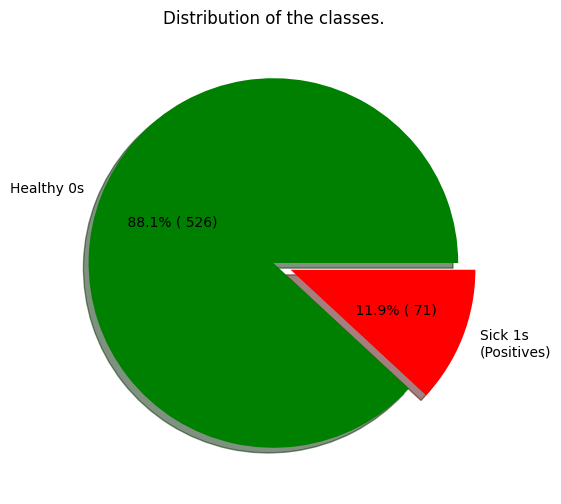

In [141]:
#Distribution of the classes.
fig, ax = plt.subplots(figsize=(6,6))

values = df_hcv["Category"].value_counts()
total = sum(values)

plt.pie(x=values, 
        colors=["green","red"], 
        labels=["Healthy 0s", "Sick 1s\n(Positives)"], 
        shadow = True, 
        explode = (0, 0.1),
        autopct=lambda pct: ' {:.1f}% ( {v:d})'.format(pct, v=int(round(pct*total/100.0)))
        )
plt.title("Distribution of the classes.")
fig.savefig(main_path+'/Distribution_classes.png')
plt.show()

In [142]:
#Statistical information of the dataset.
df_hcv.describe()

,Category,Age,Sex,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,0.118928,47.273032,0.614740,41.810553,27.541206,34.119263,11.140536,8.205126,5.377789,81.715410,37.923451,72.246064
std,0.323975,9.940131,0.487065,5.346046,20.991232,32.516907,17.281403,2.159073,1.120043,50.094238,51.847430,4.944725
min,0.000000,19.000000,0.000000,23.000000,0.900000,12.000000,1.800000,1.420000,1.430000,8.000000,4.500000,51.000000
25%,0.000000,39.000000,0.000000,39.000000,16.500000,21.600000,5.300000,6.950000,4.620000,68.000000,15.600000,69.400000
50%,0.000000,47.000000,1.000000,41.900000,23.000000,25.800000,7.300000,8.270000,5.300000,77.000000,23.100000,72.200000
75%,0.000000,54.000000,1.000000,45.100000,32.600000,32.400000,11.200000,9.570000,6.080000,89.000000,39.100000,75.400000
max,1.000000,77.000000,1.000000,82.200000,258.000000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [143]:
#Separate the labels.
df_hcv_y=df_hcv['Category']

#Separate the features.
df_hcv_X=df_hcv[['Age', 'Sex', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

print("Labels:",np.shape(df_hcv_y))
print("Features:",np.shape(df_hcv_X))

Labels: (597,)
Features: (597, 11)


In [144]:
#Create normalized alternative features.
normalizer = Normalizer(norm="l2")
X_= normalizer.fit_transform(df_hcv_X)
df_hcv_X_ = pd.DataFrame(X_, columns=df_hcv_X.columns)
df_hcv_ = df_hcv_X_.merge(df_hcv_y, left_index=True, right_index=True)


In [145]:
#Statistical information of the normalized dataset.
df_hcv_.describe()

,Age,Sex,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.336665,0.004162,0.298385,0.188346,0.215141,0.070923,0.058487,0.038527,0.558750,0.218148,0.515417,0.091537
std,0.085095,0.003427,0.059271,0.102893,0.109479,0.076532,0.016873,0.010234,0.104365,0.149024,0.088992,0.288621
min,0.042270,0.000000,0.032162,0.002113,0.017643,0.010108,0.004011,0.003768,0.077365,0.038451,0.063496,0.000000
25%,0.280390,0.000000,0.277991,0.125298,0.161852,0.038142,0.050513,0.033297,0.514488,0.119429,0.482617,0.000000
50%,0.339900,0.006075,0.308045,0.168837,0.186320,0.053071,0.060569,0.038916,0.570107,0.169449,0.534107,0.000000
75%,0.395354,0.007147,0.334933,0.227927,0.220340,0.076013,0.068883,0.044831,0.626479,0.261238,0.568449,0.000000
max,0.574871,0.009963,0.495746,0.808728,0.903339,0.840696,0.112565,0.077268,0.991592,0.969115,0.697473,1.000000


#Dimensionality reduction using PCA

In [146]:
features = df_hcv_X_[["CHOL","ALB","PROT","CREA"]]

pca = PCA(n_components=1, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Create a new DataFrame with the reduced features and proper column names
df_hcv_pca_X = pd.DataFrame(data = features_pca, columns = ["PCA_CAPC"])

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

#Creamos unas caracteristicas  alternativas normalizadas

df_hcv_X_ = df_hcv_pca_X.merge(df_hcv_X_, left_index=True, right_index=True)
df_hcv_X_.head()

Original number of features: 4
Reduced number of features: 1


,PCA_CAPC,Age,Sex,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.059960,0.230263,0.007196,0.277035,0.055407,0.159025,0.053968,0.049866,0.023242,0.762747,0.087068,0.496505
1,-0.816454,0.259760,0.008117,0.312523,0.146115,0.200502,0.031658,0.090672,0.038964,0.600694,0.126633,0.620988
2,-0.255956,0.214620,0.006707,0.314553,0.242789,0.352782,0.040912,0.059289,0.034876,0.576792,0.222669,0.531856
3,-0.539622,0.238218,0.007444,0.321595,0.227796,0.168242,0.140698,0.054567,0.035286,0.595546,0.251618,0.563535
4,-0.475783,0.254388,0.007950,0.311625,0.259158,0.197150,0.076316,0.072739,0.034342,0.604171,0.237694,0.546139


#Train and Test Separation

We select 3 different distributions of the train and the test, where the train is data augmented to compensate for the class imbalance.

In [147]:
#Distribution 1
Seed1=42
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_hcv_X_, df_hcv_y, test_size=0.3, random_state=Seed1, stratify=df_hcv_y)
#Class balancing with data augmetation
ros1 = RandomOverSampler(random_state=Seed1)
X_train1, y_train1 = ros1.fit_resample(X_train1, y_train1)

#Distribution 2
Seed2=9
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_hcv_X_, df_hcv_y, test_size=0.3, random_state=Seed2, stratify=df_hcv_y)
#Class balancing with data augmetation
ros2 = RandomOverSampler(random_state=Seed2)
X_train2, y_train2 = ros2.fit_resample(X_train2, y_train2)

#Distribution 3
Seed3=18
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_hcv_X_, df_hcv_y, test_size=0.3, random_state=Seed3, stratify=df_hcv_y)
#Class balancing with data augmetation
ros3 = RandomOverSampler(random_state=Seed3)
X_train3, y_train3 = ros3.fit_resample(X_train3, y_train3)


#Model training

## Model Radom Forest 4 Features + 1 PCA

In [149]:
rf_classifier1 = RandomForestClassifier(
                      min_samples_leaf=5,
                      criterion="gini",
                      max_depth=10,
                      n_estimators=225,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42)
rf_classifier2 = RandomForestClassifier(
                      min_samples_leaf=5,
                      criterion="gini",
                      max_depth=10,
                      n_estimators=225,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42)
rf_classifier3 = RandomForestClassifier(
                      min_samples_leaf=5,
                      criterion="gini",
                      max_depth=10,
                      n_estimators=225,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42)

columns=['Age','ALT', 'AST', 'BIL', 'PCA_CAPC']

rf_classifier1.fit(X_train1[columns], y_train1)
rf_classifier2.fit(X_train2[columns], y_train2)
rf_classifier3.fit(X_train3[columns], y_train3)

y_pred_test_rf1 = rf_classifier1.predict(X_test1[columns])
y_pred_train_rf1 = rf_classifier1.predict(X_train1[columns])

y_pred_test_rf2 = rf_classifier2.predict(X_test2[columns])
y_pred_train_rf2 = rf_classifier2.predict(X_train2[columns])

y_pred_test_rf3 = rf_classifier3.predict(X_test3[columns])
y_pred_train_rf3 = rf_classifier3.predict(X_train3[columns])


In [150]:
# Define the model and distribution names
model_names = ['ModelRF'] * 3
distribution_names = ['Distribution1', 'Distribution2', 'Distribution3']

# Define the performance metrics
accuracy_test = [round(accuracy_score(y_test1, y_pred_test_rf1),3)*100,
                 round(accuracy_score(y_test2, y_pred_test_rf2),3)*100,
                 round(accuracy_score(y_test3, y_pred_test_rf3),3)*100]

accuracy_train = [round(accuracy_score(y_train1, y_pred_train_rf1),3)*100,
                  round(accuracy_score(y_train2, y_pred_train_rf2),3)*100,
                  round(accuracy_score(y_train3, y_pred_train_rf3),3)*100]

f1_score_test = [round(f1_score(y_test1, y_pred_test_rf1),3),
                 round(f1_score(y_test2, y_pred_test_rf2),3),
                 round(f1_score(y_test3, y_pred_test_rf3),3)]

roc_auc_test = [round(roc_auc_score(y_test1, y_pred_test_rf1),3),
                round(roc_auc_score(y_test2, y_pred_test_rf2),3),
                round(roc_auc_score(y_test3, y_pred_test_rf3),3)]

# Define the confusion matrix for test data
tn_test = [confusion_matrix(y_test1, y_pred_test_rf1)[0][0],
           confusion_matrix(y_test2, y_pred_test_rf2)[0][0],
           confusion_matrix(y_test3, y_pred_test_rf3)[0][0]]

fp_test = [confusion_matrix(y_test1, y_pred_test_rf1)[0][1],
           confusion_matrix(y_test2, y_pred_test_rf2)[0][1],
           confusion_matrix(y_test3, y_pred_test_rf3)[0][1]]

fn_test = [confusion_matrix(y_test1, y_pred_test_rf1)[1][0],
           confusion_matrix(y_test2, y_pred_test_rf2)[1][0],
           confusion_matrix(y_test3, y_pred_test_rf3)[1][0]]

tp_test = [confusion_matrix(y_test1, y_pred_test_rf1)[1][1],
           confusion_matrix(y_test2, y_pred_test_rf2)[1][1],
           confusion_matrix(y_test3, y_pred_test_rf3)[1][1]]

# Define the confusion matrix for train data
tn_train = [confusion_matrix(y_train1, y_pred_train_rf1)[0][0],
            confusion_matrix(y_train2, y_pred_train_rf2)[0][0],
            confusion_matrix(y_train3, y_pred_train_rf3)[0][0]]

fp_train = [confusion_matrix(y_train1, y_pred_train_rf1)[0][1],
            confusion_matrix(y_train2, y_pred_train_rf2)[0][1],
            confusion_matrix(y_train3, y_pred_train_rf3)[0][1]]

fn_train = [confusion_matrix(y_train1, y_pred_train_rf1)[1][0],
            confusion_matrix(y_train2, y_pred_train_rf2)[1][0],
            confusion_matrix(y_train3, y_pred_train_rf3)[1][0]]

tp_train = [confusion_matrix(y_train1, y_pred_train_rf1)[1][1],
            confusion_matrix(y_train2, y_pred_train_rf2)[1][1],
            confusion_matrix(y_train3, y_pred_train_rf3)[1][1]]

# Create the dataframe
data = {'Model': model_names, 'Distribution': distribution_names,
        'Accuracy (test)': accuracy_test, 
        'F1 score (test)': f1_score_test, 'ROC AUC (test)': roc_auc_test,"TN (test)":tn_test,"FP (test)":fp_test,
        "FN (test)":fn_test,"TP (test)":tp_test,'Accuracy (train)': accuracy_train,"TN (train)":tn_train,
        "FP (train)":fp_train,"FN (train)":fn_train,
        "TP (train)":tp_train}  

df_metrics_rf1 = pd.DataFrame(data)

# Print the dataframe
df_metrics_rf1

,Model,Distribution,Accuracy (test),F1 score (test),ROC AUC (test),TN (test),FP (test),FN (test),TP (test),Accuracy (train),TN (train),FP (train),FN (train),TP (train)
0,ModelRF,Distribution1,99.4,0.976,0.976,159,0,1,20,98.9,359,8,0,367
1,ModelRF,Distribution2,95.0,0.809,0.930,152,7,2,19,99.9,366,1,0,367
2,ModelRF,Distribution3,97.2,0.889,0.964,155,4,1,20,99.3,362,5,0,367


In [151]:
importances = rf_classifier1.feature_importances_
index = np.argsort(importances)[::-1]

for i in range(df_hcv_X_[columns].shape[1]):
    print("%d. feature %s (%f)" % (i + 1, columns[index[i]], importances[index[i]]))

1. feature PCA_CAPC (0.328969)
2. feature AST (0.273976)
3. feature ALT (0.242663)
4. feature Age (0.109981)
5. feature BIL (0.044412)
